<a href="https://colab.research.google.com/github/k3nidhi/Datascience/blob/main/task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load the dataset

In [1]:
import numpy as np
import pandas as pd

data=pd.read_csv("/content/accident.csv")

Preview the dataset

In [4]:
data.head()

,Accident_ID,State,Date,Time,Reason,Number_of_Deaths,Number_of_Injuries,Road_Type,Weather_Conditions,Alcohol_Involved,Driver_Fatigue,Road_Conditions,Speed_Limit
0,1001,Andhra Pradesh,2021-05-01,15:30:00,Speeding,2,3,Rural,Sunny,No,No,Poor,60.0
1,1002,Karnataka,2021-05-02,18:45:00,Drunk Driving,1,4,Urban,Rainy,Yes,No,Good,40.0
2,1003,Delhi,2021-05-03,10:15:00,Poor Road Conditions,0,2,Urban,Foggy,No,No,Poor,50.0
3,1004,Maharashtra,2021-05-04,06:00:00,Driver Fatigue,3,6,Rural,Sunny,No,Yes,Good,70.0
4,1005,Uttar Pradesh,2021-05-05,21:20:00,Speeding,1,2,Rural,Sunny,No,No,Fair,80.0


 Data Preprocessing

In [6]:
# Assuming 'Date' column has mixed formats like 'YYYY-MM-DD' and 'HH:MM:SS'

data['Date'] = pd.to_datetime(data['Date'], format='mixed', errors='coerce')

data['Time'] = pd.to_datetime(data['Time'], format='%H:%M:%S', errors='coerce').dt.time

Visualization

Reasons for accident

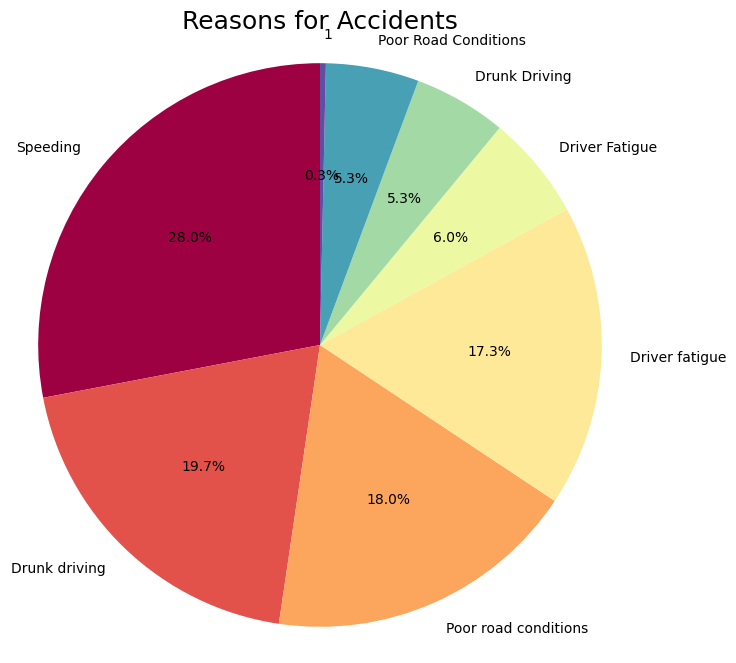

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



# Calculate the number of accidents for each reason
reason_counts = data['Reason'].value_counts()

# Define the colors for the pie chart using spectral color map
colors = plt.cm.Spectral(np.linspace(0, 1, len(reason_counts)))

# Plot the data as a pie chart
plt.figure(figsize=(8,8)) # set the size of the figure
plt.pie(reason_counts, labels=reason_counts.index, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Reasons for Accidents', fontsize=18)
plt.axis('equal') # make the pie chart circular
plt.show()

ACCIDENT COUNT BY STATE

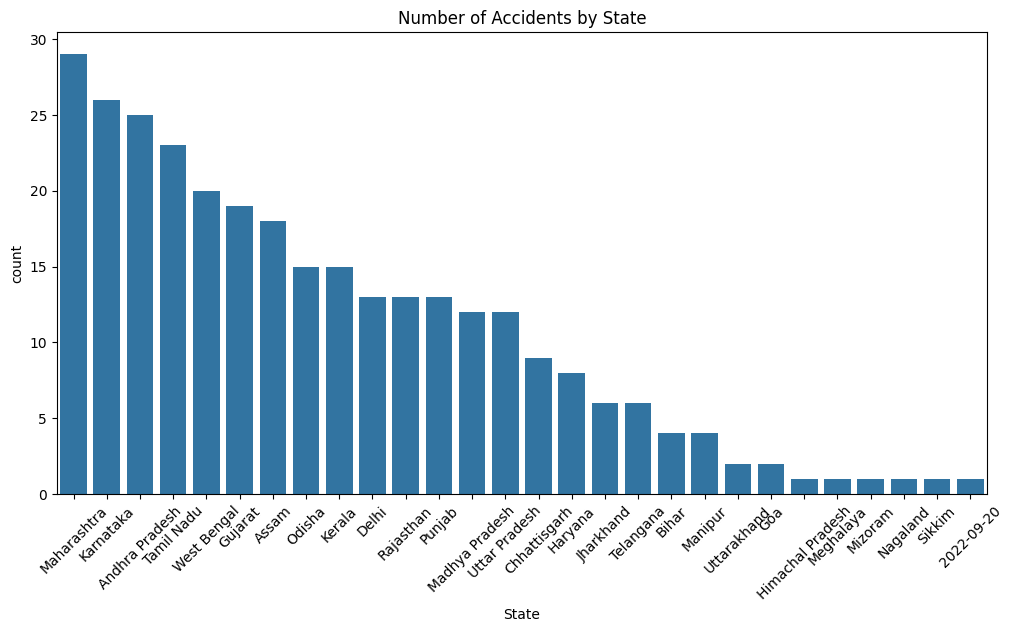

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='State', order=data['State'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Number of Accidents by State")
plt.show()


Impact of Weather Conditions

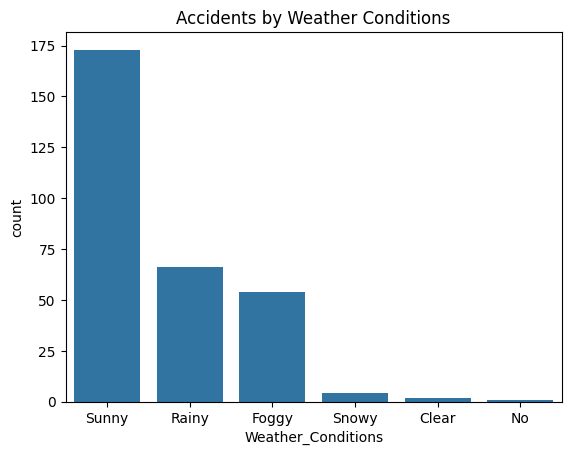

In [11]:

sns.countplot(data=data, x='Weather_Conditions', order=data['Weather_Conditions'].value_counts().index)
plt.title("Accidents by Weather Conditions")
plt.show()



Accident Severity by Speed Limit

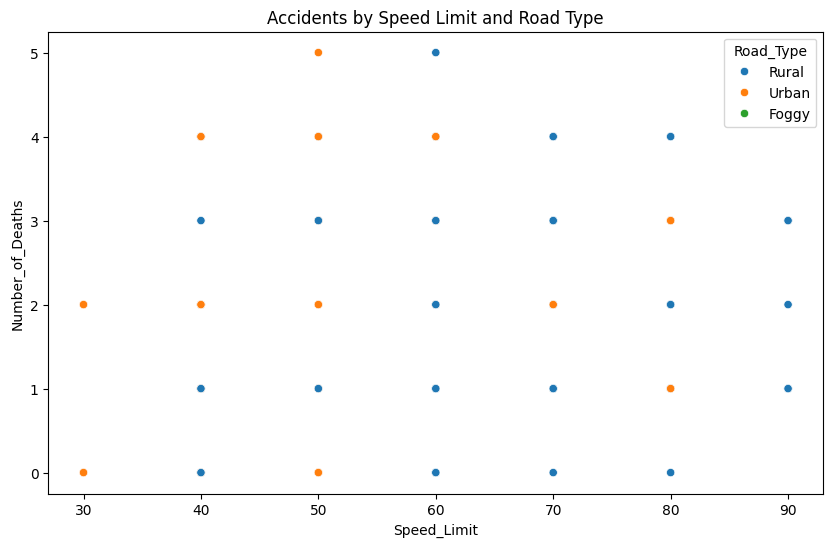

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Speed_Limit', y='Number_of_Deaths', hue='Road_Type')
plt.title("Accidents by Speed Limit and Road Type")
plt.show()


Accident Distribution by Time of Day

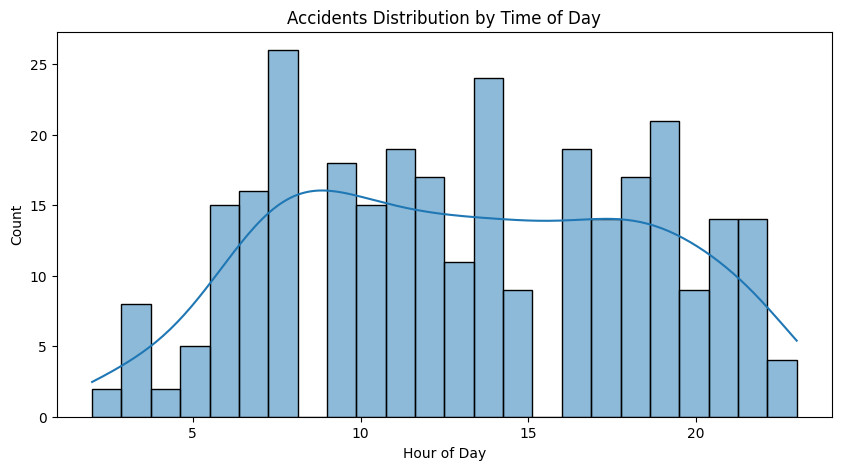

In [13]:
data['Hour'] = pd.to_datetime(data['Time'], format='%H:%M:%S').dt.hour
plt.figure(figsize=(10, 5))
sns.histplot(data=data, x='Hour', bins=24, kde=True)
plt.title("Accidents Distribution by Time of Day")
plt.xlabel("Hour of Day")
plt.show()


Hotspot Analysis (by State and Reason)

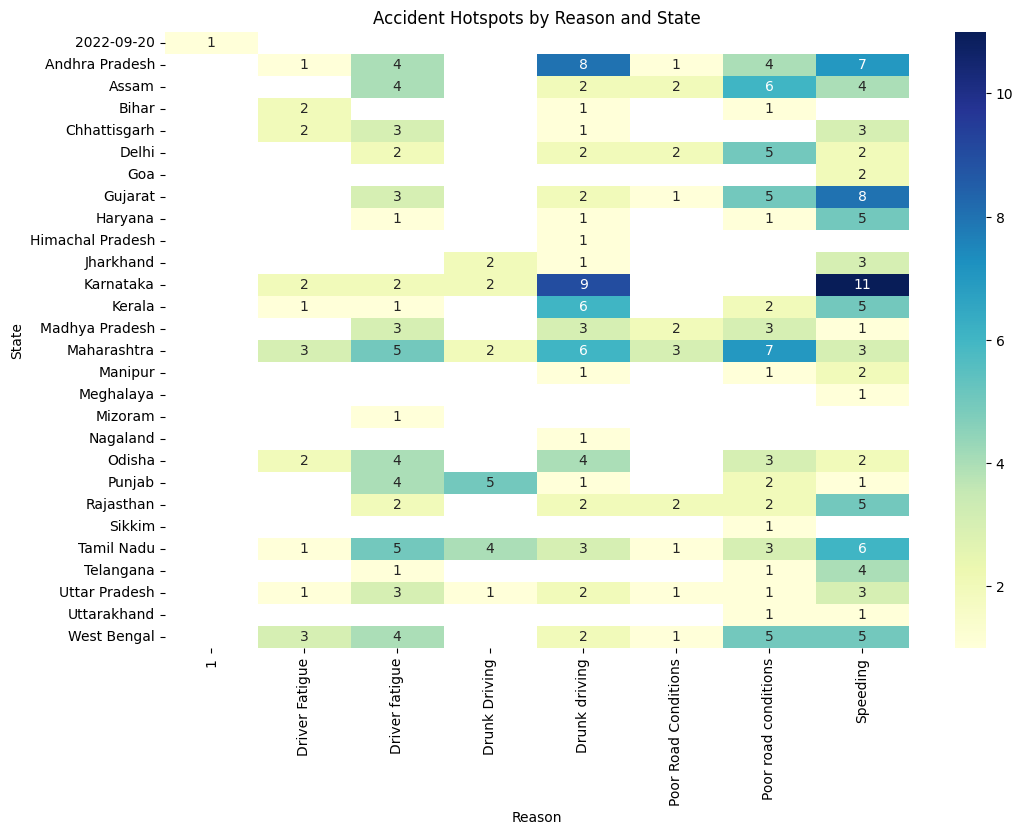

In [14]:
plt.figure(figsize=(12, 8))
accident_reason_state = data.pivot_table(index='State', columns='Reason', values='Accident_ID', aggfunc='count')
sns.heatmap(accident_reason_state, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Accident Hotspots by Reason and State")
plt.show()
